### A) PCA y clústering con k-means

1.	A partir de la base de datos Iris, con sus cuatro características, obtened los dos primeros componentes principales. Representad gráficamente los puntos de datos a partir de los dos componentes principales obtenidos. Como estamos realizando aprendizaje no supervisado, no es necesario tener en cuenta las etiquetas de clase.

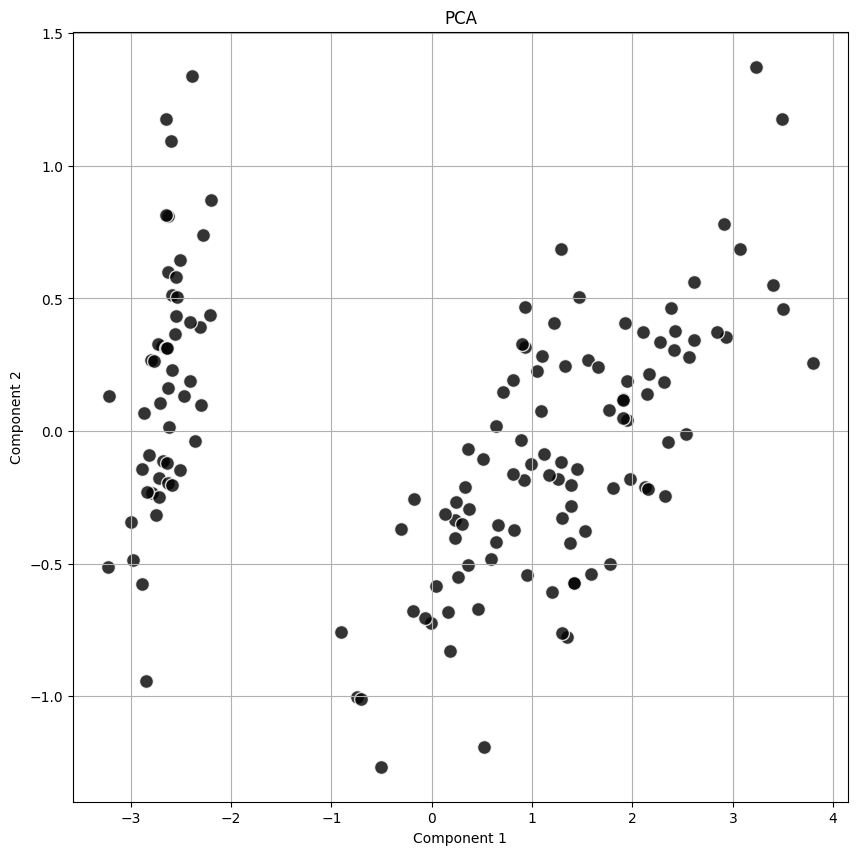

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

components = ['Component_1', 'Component_2']
df_pca = pd.DataFrame(X_pca, columns=components)

plt.figure(figsize=(10, 10))
plt.scatter(df_pca['Component_1'], df_pca['Component_2'], alpha=0.8, edgecolors='w', s=100, c='k')
plt.title('PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()
plt.show()


2.	Distribuid los datos en tres clústeres. Representadlos ahora con colores que indiquen el clúster al que pertenecen.

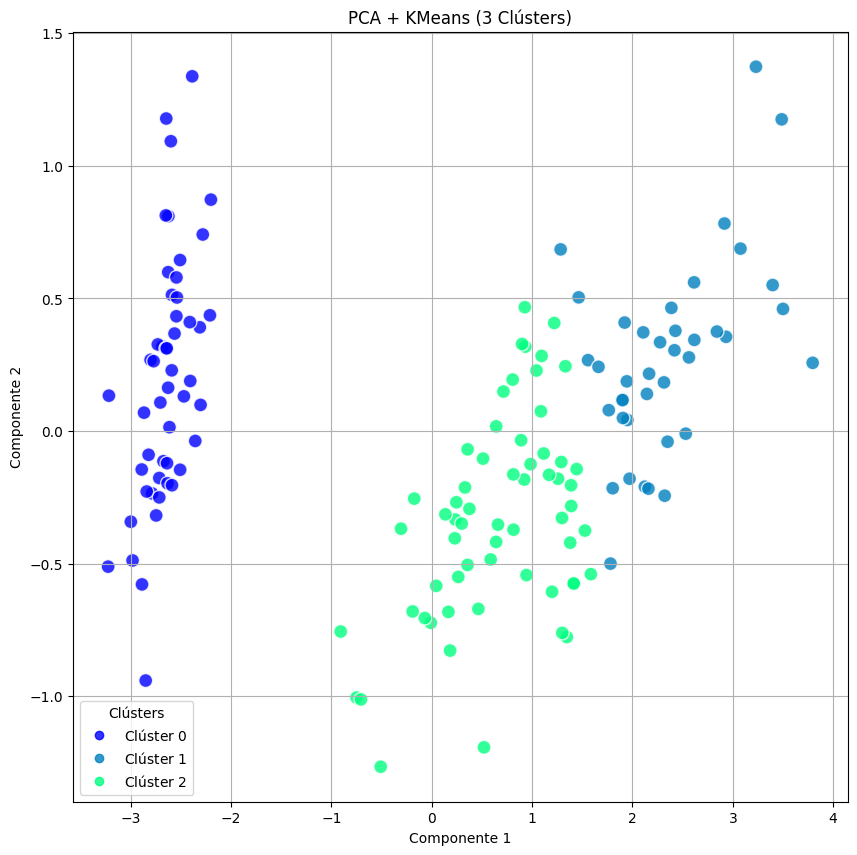

In [99]:
kmeans = KMeans(n_clusters=3, random_state=0, init='random', n_init=10, max_iter=300, tol=1e-04)
clusters = kmeans.fit_predict(X_pca)

df_pca['Cluster'] = clusters

plt.figure(figsize=(10, 10))
scatter = plt.scatter(df_pca['Component_1'], df_pca['Component_2'], 
                      alpha=0.8, edgecolors='w', s=100, 
                      c=df_pca['Cluster'], cmap='winter')
plt.title('PCA + KMeans (3 Clústers)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()

handles, labels = scatter.legend_elements()

labels = [f'Clúster {label}' for label in labels]

plt.legend(handles, labels, title="Clústers", loc="best")
plt.show()

## B) Clústeting jerárquico

3. Representad el dendrograma del clustering jerárquico de los mismos datos obtenidos en la pregunta 1.

In [102]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Etiquetas de clústers: %s' % labels)

Etiquetas de clústers: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


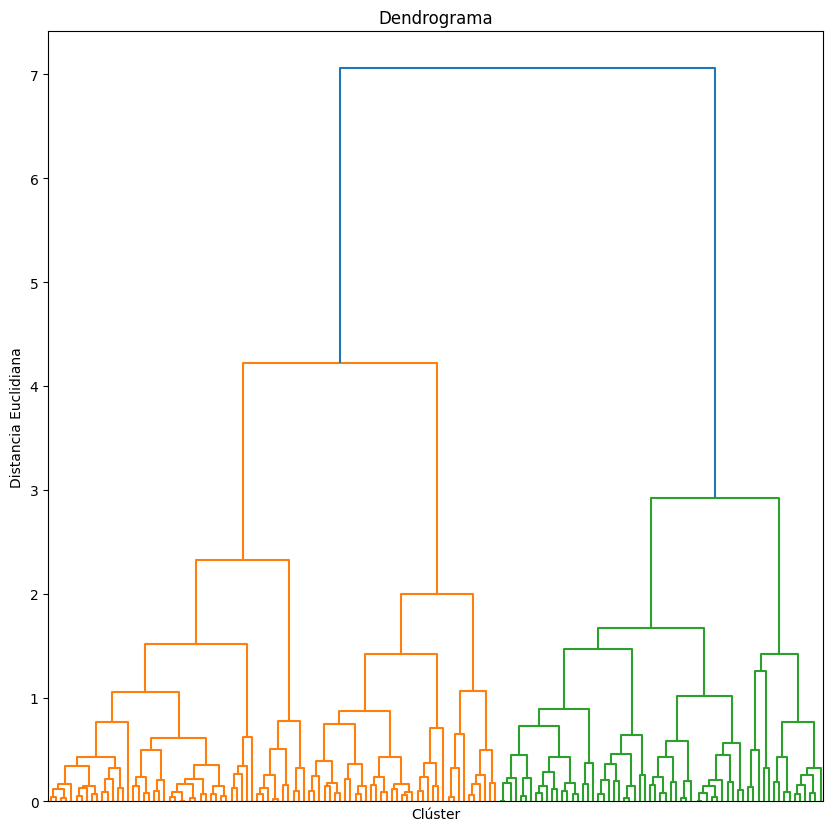

In [103]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked_cluster = linkage(X_pca, method='complete', metric='euclidean')
labels = ['Clúster 0', 'Clúster 1', 'Clúster 2']

plt.figure(figsize=(10, 10))
dendrogram(linked_cluster, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Clúster')
plt.ylabel('Distancia Euclidiana')

# He decidido no mostrar los ticks del eje x para que sea más legible
plt.xticks([])
plt.show()
